In [25]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math

In [26]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2436903573629344196, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16031557223
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8008896393184829400
 physical_device_desc: "device: 0, name: Quadro P5000, pci bus id: 0000:00:05.0, compute capability: 6.1"]

In [27]:
inp = Input((22,))
layer_output = Dense(30)(inp)
layer_output = Dense(10,name='encode')(layer_output)
layer_output = Dense(30,name='decode1')(layer_output)
layer_output = Dense(22,name='decode2')(layer_output)
encoder_model = Model(inp,outputs=layer_output)
encoder_model.compile(optimizer='adam',loss='mean_squared_error')
enc_initial_weights = encoder_model.get_weights()

def get_decoder_model_weights(encoder_model):
    inp = Input((10,))
    layer_output2 = Dense(30,name='layer1')(inp)
    layer_output2 = Dense(22,name='layer2')(layer_output2)
    decoder_model = Model(inp,outputs=layer_output2)
    decoder_model.compile(optimizer='adam',loss='mean_squared_error')
    decoder_model.get_layer('layer1').set_weights(encoder_model.get_layer('decode1').get_weights())
    decoder_model.get_layer('layer2').set_weights(encoder_model.get_layer('decode2').get_weights())
    return decoder_model

In [9]:
# with open('data-localize-landmarks0.pckl','rb') as file:
#     all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)    

In [28]:
train_encoded = []
test_encoded = []
decoders = []
for i in range(5):
    print("Loading file")
    with open('data-localize-landmarks'+str(i)+'.pckl','rb') as file:
        all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)
    model_weights = encoder_model.set_weights(enc_initial_weights)
    print("loaded")
    encoder_model.fit(np.array(all_landmarks),np.array(all_landmarks),epochs=100,
                  validation_data=(np.array(test_landmarks),np.array(test_landmarks)))
    encoder_output = Model(encoder_model.input,outputs=encoder_model.get_layer('encode').output)
    train_encoded.append(encoder_output.predict(np.array(all_landmarks)))
    test_encoded.append(encoder_output.predict(np.array(test_landmarks)))
    decoder_model = get_decoder_model_weights(encoder_model)
    decoders.append(decoder_model)

Loading file
loaded
Train on 906 samples, validate on 76 samples
Epoch 1/100
906/906 [==============================] - 1s 2ms/step - loss: 47680.5660 - val_loss: 20378.8924
Epoch 2/100
906/906 [==============================] - 0s 104us/step - loss: 9559.4052 - val_loss: 3163.5071
Epoch 3/100
906/906 [==============================] - 0s 99us/step - loss: 3324.8655 - val_loss: 1960.4464
Epoch 4/100
906/906 [==============================] - 0s 110us/step - loss: 2678.6270 - val_loss: 1557.7580
Epoch 5/100
906/906 [==============================] - 0s 101us/step - loss: 2276.3166 - val_loss: 1297.0078
Epoch 6/100
906/906 [==============================] - 0s 94us/step - loss: 1952.4633 - val_loss: 1118.2633
Epoch 7/100
906/906 [==============================] - 0s 103us/step - loss: 1685.7795 - val_loss: 929.4195
Epoch 8/100
906/906 [==============================] - 0s 102us/step - loss: 1442.4267 - val_loss: 777.8431
Epoch 9/100
906/906 [==============================] - 0s 94us/step

906/906 [==============================] - 0s 101us/step - loss: 31.8048 - val_loss: 33.9983
Epoch 78/100
906/906 [==============================] - 0s 92us/step - loss: 31.6899 - val_loss: 37.0210
Epoch 79/100
906/906 [==============================] - 0s 94us/step - loss: 31.6690 - val_loss: 35.4870
Epoch 80/100
906/906 [==============================] - 0s 102us/step - loss: 31.0339 - val_loss: 34.6381
Epoch 81/100
906/906 [==============================] - 0s 99us/step - loss: 30.4282 - val_loss: 33.6397
Epoch 82/100
906/906 [==============================] - 0s 105us/step - loss: 30.9958 - val_loss: 32.3996
Epoch 83/100
906/906 [==============================] - 0s 106us/step - loss: 30.2132 - val_loss: 32.0309
Epoch 84/100
906/906 [==============================] - 0s 111us/step - loss: 29.9200 - val_loss: 32.3757
Epoch 85/100
906/906 [==============================] - 0s 123us/step - loss: 29.8919 - val_loss: 30.9861
Epoch 86/100
906/906 [==============================] - 0s 130

Epoch 54/100
906/906 [==============================] - 0s 136us/step - loss: 35.8336 - val_loss: 34.6890
Epoch 55/100
906/906 [==============================] - 0s 115us/step - loss: 35.3112 - val_loss: 34.1837
Epoch 56/100
906/906 [==============================] - 0s 113us/step - loss: 35.1478 - val_loss: 34.1266
Epoch 57/100
906/906 [==============================] - 0s 127us/step - loss: 34.5450 - val_loss: 33.6709
Epoch 58/100
906/906 [==============================] - 0s 116us/step - loss: 34.5009 - val_loss: 33.9664
Epoch 59/100
906/906 [==============================] - 0s 121us/step - loss: 34.2631 - val_loss: 34.4142
Epoch 60/100
906/906 [==============================] - 0s 127us/step - loss: 33.8565 - val_loss: 33.4542
Epoch 61/100
906/906 [==============================] - 0s 117us/step - loss: 33.4953 - val_loss: 32.7705
Epoch 62/100
906/906 [==============================] - 0s 97us/step - loss: 32.9997 - val_loss: 31.5870
Epoch 63/100
906/906 [=========================

Epoch 31/100
906/906 [==============================] - 0s 88us/step - loss: 54.1083 - val_loss: 43.7772
Epoch 32/100
906/906 [==============================] - 0s 89us/step - loss: 52.1385 - val_loss: 43.2296
Epoch 33/100
906/906 [==============================] - 0s 94us/step - loss: 50.3256 - val_loss: 43.2838
Epoch 34/100
906/906 [==============================] - 0s 99us/step - loss: 48.2924 - val_loss: 42.5533
Epoch 35/100
906/906 [==============================] - 0s 106us/step - loss: 46.6955 - val_loss: 42.0946
Epoch 36/100
906/906 [==============================] - 0s 98us/step - loss: 45.4230 - val_loss: 41.6734
Epoch 37/100
906/906 [==============================] - 0s 98us/step - loss: 44.5123 - val_loss: 40.0018
Epoch 38/100
906/906 [==============================] - 0s 116us/step - loss: 43.3454 - val_loss: 39.6136
Epoch 39/100
906/906 [==============================] - 0s 106us/step - loss: 42.1660 - val_loss: 39.4922
Epoch 40/100
906/906 [==============================

909/909 [==============================] - 0s 96us/step - loss: 256.2113 - val_loss: 102.0768
Epoch 8/100
909/909 [==============================] - 0s 93us/step - loss: 197.9579 - val_loss: 85.7918
Epoch 9/100
909/909 [==============================] - 0s 95us/step - loss: 169.6215 - val_loss: 78.7810
Epoch 10/100
909/909 [==============================] - 0s 97us/step - loss: 154.7649 - val_loss: 77.5032
Epoch 11/100
909/909 [==============================] - 0s 118us/step - loss: 144.9791 - val_loss: 69.2770
Epoch 12/100
909/909 [==============================] - 0s 117us/step - loss: 137.9240 - val_loss: 67.9375
Epoch 13/100
909/909 [==============================] - 0s 113us/step - loss: 129.6043 - val_loss: 66.1483
Epoch 14/100
909/909 [==============================] - 0s 96us/step - loss: 124.1429 - val_loss: 67.3228
Epoch 15/100
909/909 [==============================] - 0s 101us/step - loss: 118.2129 - val_loss: 62.6391
Epoch 16/100
909/909 [==============================] - 

909/909 [==============================] - 0s 94us/step - loss: 26.8022 - val_loss: 20.3230
Epoch 85/100
909/909 [==============================] - 0s 94us/step - loss: 26.4194 - val_loss: 19.5462
Epoch 86/100
909/909 [==============================] - 0s 90us/step - loss: 26.1308 - val_loss: 19.7987
Epoch 87/100
909/909 [==============================] - 0s 97us/step - loss: 26.1069 - val_loss: 20.8767
Epoch 88/100
909/909 [==============================] - 0s 96us/step - loss: 25.7807 - val_loss: 20.0820
Epoch 89/100
909/909 [==============================] - 0s 94us/step - loss: 25.2475 - val_loss: 19.1799
Epoch 90/100
909/909 [==============================] - 0s 97us/step - loss: 24.9174 - val_loss: 18.5540
Epoch 91/100
909/909 [==============================] - 0s 103us/step - loss: 24.6702 - val_loss: 19.3550
Epoch 92/100
909/909 [==============================] - 0s 93us/step - loss: 24.2427 - val_loss: 18.5717
Epoch 93/100
909/909 [==============================] - 0s 111us/st

Epoch 61/100
909/909 [==============================] - 0s 99us/step - loss: 34.6484 - val_loss: 22.0367
Epoch 62/100
909/909 [==============================] - 0s 90us/step - loss: 34.3935 - val_loss: 21.8730
Epoch 63/100
909/909 [==============================] - 0s 89us/step - loss: 33.9799 - val_loss: 21.5850
Epoch 64/100
909/909 [==============================] - 0s 94us/step - loss: 33.6824 - val_loss: 23.3423
Epoch 65/100
909/909 [==============================] - 0s 89us/step - loss: 33.9222 - val_loss: 20.9490
Epoch 66/100
909/909 [==============================] - 0s 98us/step - loss: 33.1261 - val_loss: 21.3301
Epoch 67/100
909/909 [==============================] - 0s 92us/step - loss: 32.6783 - val_loss: 20.4853
Epoch 68/100
909/909 [==============================] - 0s 90us/step - loss: 32.4286 - val_loss: 20.6528
Epoch 69/100
909/909 [==============================] - 0s 95us/step - loss: 32.3336 - val_loss: 20.6883
Epoch 70/100
909/909 [==============================] -

In [29]:
cnn_base = VGG16(input_shape=(448,448,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    if layer.name=='block5_conv3':
        break
    layer.trainable = False

x = cnn_base.get_layer('block5_pool').output
x = Conv2D(1024, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = BatchNormalization()(x)
x = Conv2D(1024, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x=  Dense(10)(x)
model = Model(inputs=cnn_base.input, outputs=x)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])
initial_weights = model.get_weights()

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 448, 448, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0         
__________

In [ ]:
train_pred = []
test_pred = []

train_scores = []
test_scores = []

history_record = []


In [37]:

for i in range(5):
    print("Loading file")
    with open('data-localize-landmarks'+str(i)+'.pckl','rb') as file:
        all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)
    try:
        with open('landmarks_localization_vgg16_shape'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    history = model.fit(x=np.array(all_images),y=train_encoded[i],batch_size=5,epochs=50,
                       validation_data=(np.array(test_images),test_encoded[i]))
    history_record.append(history)
    train_score = model.evaluate(x=np.array(all_images),y=train_encoded[i],batch_size=50)
    test_score = model.evaluate(x=np.array(test_images),y=test_encoded[i],batch_size=50)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print("predicting")
    print("Test Score",test_score)
    train_predictions = model.predict(x=np.array(all_images),batch_size=50)
    test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
    train_pred.append(train_predictions)
    test_pred.append(test_predictions)
    
    try:
        with open('landmarks_localization_vgg16_shape'+str(i)+'.hd5','wb') as f:
            pickle.dump(model.get_weights(),f)
    except Exception as ex:
        print("Could not write",ex)

Loading file
setting initial weights
loaded
Train on 906 samples, validate on 76 samples
Epoch 1/50
906/906 [==============================] - 24s 26ms/step - loss: 3694.5148 - acc: 0.8389 - val_loss: 1185.6461 - val_acc: 0.8816
Epoch 2/50
906/906 [==============================] - 24s 26ms/step - loss: 984.2533 - acc: 0.9194 - val_loss: 957.3718 - val_acc: 0.8421
Epoch 3/50
906/906 [==============================] - 24s 26ms/step - loss: 567.1371 - acc: 0.9415 - val_loss: 457.8652 - val_acc: 0.8816
Epoch 4/50
906/906 [==============================] - 24s 26ms/step - loss: 394.2410 - acc: 0.9570 - val_loss: 370.8731 - val_acc: 0.8947
Epoch 5/50
906/906 [==============================] - 24s 27ms/step - loss: 303.5424 - acc: 0.9581 - val_loss: 453.1912 - val_acc: 0.9079
Epoch 6/50
906/906 [==============================] - 24s 27ms/step - loss: 232.6395 - acc: 0.9636 - val_loss: 437.5331 - val_acc: 0.9342
Epoch 7/50
906/906 [==============================] - 24s 27ms/step - loss: 201.0

909/909 [==============================] - 23s 26ms/step - loss: 197.5447 - acc: 0.9736 - val_loss: 353.4941 - val_acc: 0.9067
Epoch 8/50
909/909 [==============================] - 23s 26ms/step - loss: 164.9301 - acc: 0.9747 - val_loss: 341.9134 - val_acc: 0.9200
Epoch 9/50
909/909 [==============================] - 23s 26ms/step - loss: 141.5528 - acc: 0.9769 - val_loss: 397.1813 - val_acc: 0.9200
Epoch 10/50
909/909 [==============================] - 23s 26ms/step - loss: 131.2414 - acc: 0.9780 - val_loss: 374.5620 - val_acc: 0.9333
Epoch 11/50
909/909 [==============================] - 23s 26ms/step - loss: 124.0769 - acc: 0.9758 - val_loss: 314.9604 - val_acc: 0.9200
Epoch 12/50
909/909 [==============================] - 23s 26ms/step - loss: 119.0766 - acc: 0.9802 - val_loss: 367.7803 - val_acc: 0.9200
Epoch 13/50
909/909 [==============================] - 23s 26ms/step - loss: 111.8755 - acc: 0.9835 - val_loss: 334.0756 - val_acc: 0.9333
Epoch 14/50
909/909 [====================

909/909 [==============================] - 24s 27ms/step - loss: 112.4985 - acc: 0.9736 - val_loss: 478.3508 - val_acc: 0.9600
Epoch 15/50
909/909 [==============================] - 24s 27ms/step - loss: 116.1360 - acc: 0.9736 - val_loss: 221.3707 - val_acc: 0.9867
Epoch 16/50
909/909 [==============================] - 24s 27ms/step - loss: 110.8312 - acc: 0.9747 - val_loss: 266.6816 - val_acc: 0.9733
Epoch 17/50
909/909 [==============================] - 24s 27ms/step - loss: 106.8819 - acc: 0.9747 - val_loss: 344.0024 - val_acc: 0.9867
Epoch 18/50
909/909 [==============================] - 24s 27ms/step - loss: 110.6715 - acc: 0.9813 - val_loss: 192.8898 - val_acc: 0.9867
Epoch 19/50
909/909 [==============================] - 24s 27ms/step - loss: 102.9301 - acc: 0.9725 - val_loss: 340.1698 - val_acc: 0.9733
Epoch 20/50
909/909 [==============================] - 24s 27ms/step - loss: 102.2841 - acc: 0.9824 - val_loss: 239.1676 - val_acc: 0.9733
Epoch 21/50
909/909 [==================

In [38]:
test_predds = []
for i in range(5):
    test_predds.append(decoders[i].predict(test_pred[i]))

In [52]:
test_predictions = model.predict(x=np.array(test_images),batch_size=50)

In [55]:
predictions = decoders[0].predict(test_predictions)

In [ ]:
historys = []
for hist in history_record:
    historys.append(hist.history)
    
with open('vgg16-landmark-predictions-shape.pckl','wb') as file:
    pickle.dump((train_pred,test_pred,historys,train_scores,test_scores),file)

In [ ]:
with open('vgg16-landmark-predictions-shape.pckl','rb') as vgg16:
    train_pred,test_pred,historys,train_scores,test_scores = pickle.load(vgg16)

In [21]:
def global_localization_error(test_pred,test_landmarks):
    error = 0
    for idx in range(len(test_landmarks)):
        for set_num in range(11):
            predx,predy = test_pred[idx][2*set_num],test_pred[idx][2*set_num+1]
            x,y  = test_landmarks[idx][2*set_num],test_landmarks[idx][2*set_num+1]
            error = error + math.sqrt((predx-x)**2 + (predy-y)**2)
    return error/(len(test_landmarks)*11)

In [62]:
mean_error = []
for idx in range(5):
    with open('data-localize-landmarks'+str(idx)+'.pckl','rb') as file:
        all_images,all_landmarks,all_bboxes,all_image_sizes,test_images,test_landmarks,test_bboxes,test_image_sizes = pickle.load(file)
    mean_error.append(global_localization_error(test_predds[idx],test_landmarks))
print(sum(mean_error)/len(mean_error))

18.585024800719964


In [61]:
mean_error

[23.181481566599132,
 20.55639823700654,
 16.629724574801966,
 13.929196807135138,
 18.628322818057043]

In [55]:
test_pred[4].shape

(75, 10)

-4.012045


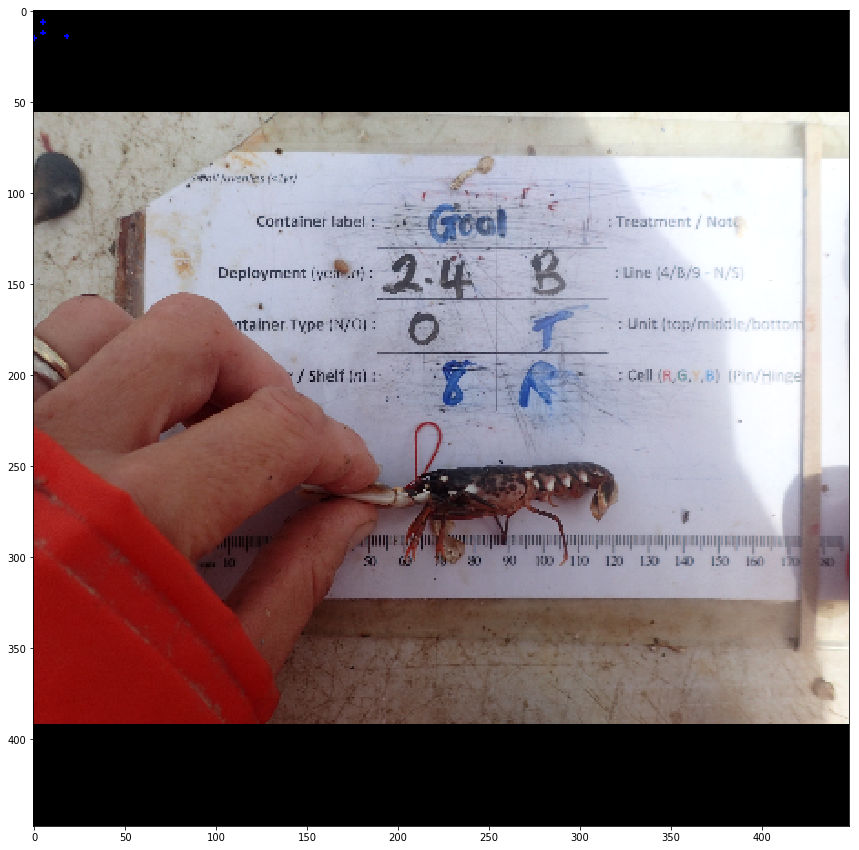

In [39]:
idx = 10
tuples = []
pred_landmarks = model.predict(np.expand_dims(np.array(test_images[idx]),0))[0]
print(pred_landmarks[0])
for i in range(11):
    tuples.append((pred_landmarks[i*2],pred_landmarks[i*2+1]))
for i in range(11):
    img = cv2.circle(test_images[idx],(int(tuples[i][0]),int(tuples[i][1])), 1, (0,0,255), -1)
pil_im = Image.fromarray(img)
plt.figure(figsize=(15,15))
plt.imshow(pil_im)

NameError: name 'history' is not defined

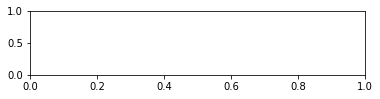

In [8]:
plt.subplot(3,1,1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Total Loss')
plt.show()
plt.subplot(3,1,2)
plt.plot(history.history['localization_output_iou_metric'])
plt.xlabel('epochs')
plt.ylabel('IoU Metric')
plt.show()
plt.subplot(3,1,3)
plt.plot(history.history['classification_output_loss'])
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [18]:
from sklearn import preprocessing
import numpy
le = preprocessing.LabelEncoder()
le.classes_ = numpy.load('classes.npy')

In [22]:
idx = np.random.randint(low=0,high=np.array(test_images).shape[0])
bb,classify = model.predict(np.expand_dims(np.array(test_images)[idx],0))
[[xmin,ymin,xmax,ymax]]= bb
img = cv2.rectangle(np.array(test_images)[idx], (xmin,ymin), (xmax,ymax), (0,255,0), 4)
pil_im = Image.fromarray(img)
a = np.argmax(classify,axis=1)[0]
label = le.inverse_transform(np.argmax(classify,axis=1))
#print(label[0])
#y = ymin - 15 if ymin - 15 > 15 else ymin + 15
plt.title("Predicted: "+label[0]+", Actual: "+le.inverse_transform(np.argmax(test_predictions[idx])))
plt.imshow(pil_im)
print(label[0])

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


IndexError: list index out of range

In [ ]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)!=predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [ ]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)==predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, predicted_labels,labels=np.unique(labels_))
print(cm)

NameError: name 'labels_test' is not defined

In [ ]:
confusion_matrix(labels_test,predicted_labels)

labels_=list(np.unique(labels_test))
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels_)
ax.set_yticklabels([''] + labels_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
idx = 101